In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('btc_1h.csv')
df.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199
1,2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006
2,2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572
3,2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030
4,2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329


In [55]:
df['datetime']=pd.to_datetime(df['datetime'])
df.set_index('datetime',inplace=True)
#df.head()

In [56]:
df['ma7'] = df['close'].rolling(window=7,min_periods=1).mean()
df['ma21'] = df['close'].rolling(window=21,min_periods=1).mean()
df.head()


,open,high,low,close,volume,ma7,ma21
datetime,,,,,,,
2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199,13529.010000,13529.010000
2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006,13366.035000,13366.035000
2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572,13354.083333,13354.083333
2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030,13368.070000,13368.070000
2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329,13414.658000,13414.658000


In [57]:
def RSI(df,w=14):
  w = int(w)
  delta = df['close'].diff()
  gain = delta.where(delta>0,0)
  loss = -delta.where(delta<0,0)

  avg_gain = gain.rolling(window=w,min_periods=1).mean()
  avg_loss = loss.rolling(window=w,min_periods=1).mean()
  rs = avg_gain / avg_loss
  rsi = 100 - (100/(1+rs))
  return np.array(rsi)

df['rsi'] = RSI(df)
df.head()

,open,high,low,close,volume,ma7,ma21,rsi
datetime,,,,,,,,
2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199,13529.010000,13529.010000,NaN
2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006,13366.035000,13366.035000,0.000000
2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572,13354.083333,13354.083333,28.057475
2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030,13368.070000,13368.070000,38.836974
2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329,13414.658000,13414.658000,54.973063


In [58]:
def sto(df, w=14):
    l= df['low'].rolling(window=w,min_periods=1).min()
    h=df['high'].rolling(window=w,min_periods=1).max()
    df['%k']=100*(df['close']-l)/(h-l)
    df['%d'] = df['%k'].rolling(window=3,min_periods=1).mean()
    df=df.drop(columns=['%k'])
    return df
df=sto(df)
df.head()

,open,high,low,close,volume,ma7,ma21,rsi,%d
datetime,,,,,,,,,
2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199,13529.010000,13529.010000,NaN,40.869345
2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006,13366.035000,13366.035000,0.000000,24.689764
2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572,13354.083333,13354.083333,28.057475,26.859590
2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030,13368.070000,13368.070000,38.836974,28.386909
2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329,13414.658000,13414.658000,54.973063,52.062993


In [59]:
def wr(df, w=14):
    l= df['low'].rolling(window=w,min_periods=1).min()
    h=df['high'].rolling(window=w,min_periods=1).max()
    wr=(-100)*(h-df['close'])/(h-l)
    #df['%d'] = df['%k'].rolling(window=3,min_periods=1).mean()
    return np.array(wr)
df['w%r']=wr(df)
df.head()

,open,high,low,close,volume,ma7,ma21,rsi,%d,w%r
datetime,,,,,,,,,,
2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199,13529.010000,13529.010000,NaN,40.869345,-59.130655
2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006,13366.035000,13366.035000,0.000000,24.689764,-91.489817
2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572,13354.083333,13354.083333,28.057475,26.859590,-68.800757
2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030,13368.070000,13368.070000,38.836974,28.386909,-54.548700
2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329,13414.658000,13414.658000,54.973063,52.062993,-20.461563


In [60]:

def macd(df,fast=14,slow=26):
  df['ema_f']=df['close'].ewm(span=fast).mean()
  df['ema_s']=df['close'].ewm(span=slow).mean()
  macd=df['ema_f']-df['ema_s']
  return np.array(macd)
def macd_signal(df,fast=14,slow=26,w=9):
  ema_f=df['close'].ewm(span=fast).mean()
  ema_s=df['close'].ewm(span=slow).mean()
  macd=ema_f-ema_s
  signal=macd.ewm(span=w).mean()
  return np.array(signal)

In [61]:
def bands(df,w=20,multiplier=2):
  sma=df['close'].rolling(window=w).mean()
  std=df['close'].rolling(window=w).std()
  upper=sma+(std*multiplier)
  lower=sma-(std*multiplier)
  return np.array(upper),np.array(lower)
df['upper'],df['lower']=bands(df)

In [49]:
def ATR(df,w=14):
  df['h-l']=df['high']-df['low']
  df['h-pc']=abs(df['high']-df['close'].shift(1))
  df['l-pc']=abs(df['low']-df['close'].shift(1))
  df['tr']=df[['h-l','h-pc','l-pc']].max(axis=1)
  df['atr']=df['tr'].rolling(window=w).mean()
  df=df.drop(columns=['h-l','h-pc','l-pc','tr'],inplace=True)
  return df
df=ATR(df)

In [62]:
df.head()

,open,high,low,close,volume,ma7,ma21,rsi,%d,w%r,upper,lower
datetime,,,,,,,,,,,,
2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199,13529.010000,13529.010000,NaN,40.869345,-59.130655,NaN,NaN
2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006,13366.035000,13366.035000,0.000000,24.689764,-91.489817,NaN,NaN
2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572,13354.083333,13354.083333,28.057475,26.859590,-68.800757,NaN,NaN
2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030,13368.070000,13368.070000,38.836974,28.386909,-54.548700,NaN,NaN
2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329,13414.658000,13414.658000,54.973063,52.062993,-20.461563,NaN,NaN


In [18]:
#df.drop(columns='ADX',inplace=True)

In [63]:
def vwap(df):
  vwap=np.cumsum(df['close']*df['volume'])/np.cumsum(df['volume'])
  return np.array(vwap)
df['vwap']=vwap(df)

In [64]:
df['macd']=macd(df)
df['macd_signal']=macd_signal(df)
df.head()

,open,high,low,close,volume,ma7,ma21,rsi,%d,w%r,upper,lower,vwap,ema_f,ema_s,macd,macd_signal
datetime,,,,,,,,,,,,,,,,,
2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199,13529.010000,13529.010000,NaN,40.869345,-59.130655,NaN,NaN,13529.010000,13529.010000,13529.010000,0.000000,0.000000
2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006,13366.035000,13366.035000,0.000000,24.689764,-91.489817,NaN,NaN,13377.791144,13354.393929,13359.766731,-5.372802,-2.984890
2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572,13354.083333,13354.083333,28.057475,26.859590,-68.800757,NaN,NaN,13361.528135,13345.144126,13349.136506,-3.992380,-3.397796
2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030,13368.070000,13368.070000,38.836974,28.386909,-54.548700,NaN,NaN,13373.683573,13364.994545,13366.159666,-1.165121,-2.641470
2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329,13414.658000,13414.658000,54.973063,52.062993,-20.461563,NaN,NaN,13412.094107,13426.570616,13420.622427,5.948189,-0.086240


In [25]:
df['a']=np.where(df['close']>df['ema_f'],1,-1)
df['b']=np.where(df['ema_f']>df['ema_s'],1,-1)
df['c']=np.where(df['macd_signal']>df['macd'],1,-1)

TypeError: 'NoneType' object is not subscriptable

In [65]:
df['return'] = df['close'].pct_change(1).shift(-1)
df['target_cls'] = np.where(df['return'] > 0, 1, 0)

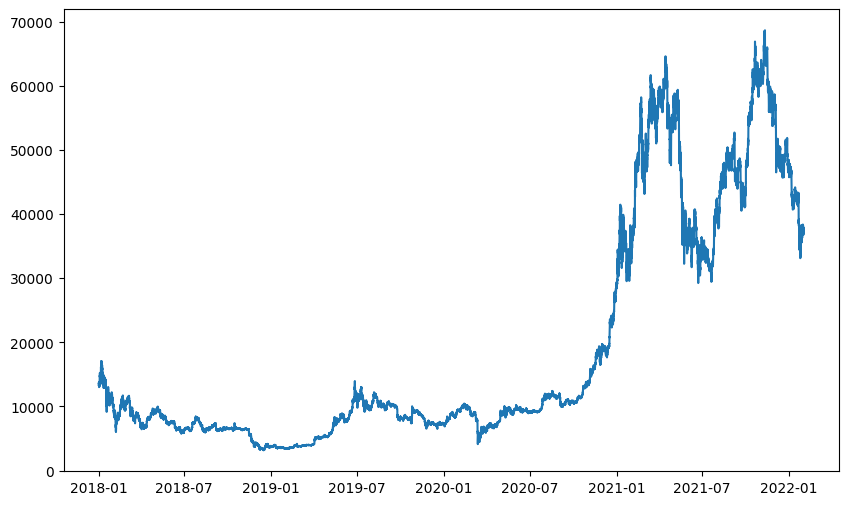

In [54]:
df = df.reset_index()
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['close'])

In [46]:
corr=df['target_cls'].corr(df['a'])
corr1=df['target_cls'].corr(df['b'])
corr2=df['target_cls'].corr(df['c'])
print(corr)
print(corr1)
print(corr2)

-0.06971815336411152
-0.0092917797860526
0.03251580588909499


In [66]:
df.to_csv('btc_1h_processed.csv',index=False)